- 워드임베딩 : Word를 vector로 바꾸는 것
- word2vec : word를 vector 바꾸는 모델 (예: CNN, GAN 등과 같은 방식을 의미)

In [1]:
# COLAB에서만 동작하는 코드
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


# 텍스트 분류

copied and modified from https://www.tensorflow.org/tutorials/keras/text_classification

In [1]:
## 설정
VOCA_SIZE = 4000 # 어휘 사전의 크기
EMBEDDING_SIZE = 64 # 단어를 임베딩한 벡터 크기

## 데이터 로딩

In [2]:
import tensorflow as tf

print('Loading data...')
(train_x, train_y), (test_x, test_y) = tf.keras.datasets.imdb.load_data(num_words=VOCA_SIZE)

print(train_x.shape)
print(train_y.shape)
print(test_x.shape)
print(test_y.shape)

Loading data...


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:155: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])


(25000,)
(25000,)
(25000,)
(25000,)


C:\Users\JuNoe\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:156: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


- imdb는 긍정/부정 리뷰 데이터
- imdb에서 가져올 단어로 voca_size를 설정하면 설정된 단어만큼 숫자로 변환해서 가져옴
- (25000,)의 의미는 25000개의 리뷰데이터와 데이터 하나당 길이를 알 수 없다는 의미

## 데이터 보기

In [3]:
print(train_x[0])
print(train_y[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
1


In [4]:
len(train_x[0])

218

In [5]:
len(train_x[1])

189

In [6]:
print(train_x[:5])
print(train_y[:5])

[list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32])
 list([1, 194, 1153, 194, 2, 78, 228, 5, 6, 1463, 2, 2, 134, 26, 4, 715, 8, 118,

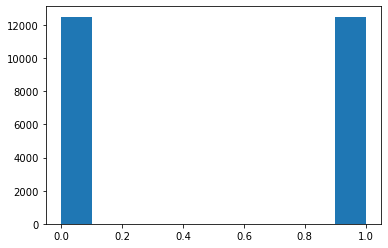

In [7]:
import matplotlib.pyplot as plt

plt.hist(train_y)
plt.show()

## 텍스트로 데이터 보기

In [8]:
# 단어와 정수 인덱스를 매핑한 딕셔너리
word_index = tf.keras.datasets.imdb.get_word_index()
# word_index = {'fawn': 34701, 'tsukino': 52006, 'nunnery': 52007, ... }

# 처음 몇 개 인덱스는 사전에 정의되어 있습니다
# imdb.get_word_index()에 저장된 값에 +3을 해야 실제 맵핑되는 정수
# 이것은 IMDB 리뷰 데이터셋에서 정한 규칙
word_index = {k:(v+3) for k,v in word_index.items()}
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

# word_index에서 key와 value를 바꿔놓는 코드
# dictionary 만들기 보충자료 참고
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
# reverse_word_index = {34704: 'fawn', 52009: 'tsukino', 52010: 'nunnery', ... }

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text]) # get함수 보충자료 참고 
#>>> ','.join('abcd')
# 'a,b,c,d'
print(train_x[0])
print(decode_review(train_x[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
<START> this film was just brilliant casting location scenery story direction <UNK> rea

## 각 데이터의 길이

In [9]:
print(len(train_x[0]))
print(len(train_x[1]))
print(len(train_x[2]))
print(len(train_x[3]))
print(len(train_x[4]))

218
189
141
550
147


## 데이터 길이 일정하게 하기

In [10]:
print(train_x[0])
print(len(train_x[0]))

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 2, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 2, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 2, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]
218


In [11]:
from tensorflow.keras.preprocessing import sequence

# 길이를 400으로 padding은 뒤로
train_x = sequence.pad_sequences(train_x, maxlen=400, padding='post')
test_x = sequence.pad_sequences(test_x, maxlen=400, padding='post')
print(train_x.shape)
print(test_x.shape)

(25000, 400)
(25000, 400)


In [12]:
print(train_x[0])
print(len(train_x[0]))

[   1   14   22   16   43  530  973 1622 1385   65  458    2   66 3941
    4  173   36  256    5   25  100   43  838  112   50  670    2    9
   35  480  284    5  150    4  172  112  167    2  336  385   39    4
  172    2 1111   17  546   38   13  447    4  192   50   16    6  147
 2025   19   14   22    4 1920    2  469    4   22   71   87   12   16
   43  530   38   76   15   13 1247    4   22   17  515   17   12   16
  626   18    2    5   62  386   12    8  316    8  106    5    4 2223
    2   16  480   66 3785   33    4  130   12   16   38  619    5   25
  124   51   36  135   48   25 1415   33    6   22   12  215   28   77
   52    5   14  407   16   82    2    8    4  107  117    2   15  256
    4    2    7 3766    5  723   36   71   43  530  476   26  400  317
   46    7    4    2 1029   13  104   88    4  381   15  297   98   32
 2071   56   26  141    6  194    2   18    4  226   22   21  134  476
   26  480    5  144   30    2   18   51   36   28  224   92   25  104
    4 

## CNN 모델 사용

In [13]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D

model = Sequential()
model.add(Input(400))
model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE)) # 텍스트는 임베딩 해서 사용한다.
model.add(Dropout(0.2))
model.add(Conv1D(250, 3))
model.add(GlobalMaxPooling1D())
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 400, 64)           256000    
_________________________________________________________________
dropout (Dropout)            (None, 400, 64)           0         
_________________________________________________________________
conv1d (Conv1D)              (None, 398, 250)          48250     
_________________________________________________________________
global_max_pooling1d (Global (None, 250)               0         
_________________________________________________________________
dense (Dense)                (None, 250)               62750     
_________________________________________________________________
dropout_1 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation (Activation)      (None, 250)               0

In [14]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 3s 3ms/step - loss: 0.4691 - accuracy: 0.8861
loss = 0.46907028555870056
acc = 0.8861200213432312


## RNN 모델 사용


In [15]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
# from tensorflow.keras.layers import CuDNNLSTM
from tensorflow.keras.layers import Bidirectional, LSTM

model = Sequential()
model.add(Input(400))
model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE)) # 자연어처리 위해 넣은 코드
model.add(Dropout(0.2))
# model.add(Bidirectional(CuDNNLSTM(64))) # COLAB RNN 코드
model.add(Bidirectional(LSTM(64))) # 윈도우 RNN 코드 CuDNNLSTM은 내장되있음
# https://ws-choi.github.io/blog-kor/nlp/deeplearning/Bidirectional-RNN-and-LSTM/
# https://ws-choi.github.io/blog-kor/bidirectional-rnn-in-pytorch/
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 400, 64)           256000    
_________________________________________________________________
dropout_2 (Dropout)          (None, 400, 64)           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 128)               66048     
_________________________________________________________________
dense_2 (Dense)              (None, 250)               32250     
_________________________________________________________________
dropout_3 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_2 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                

In [16]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 9s 11ms/step - loss: 0.3958 - accuracy: 0.8683
loss = 0.39583566784858704
acc = 0.8682799935340881


# Word2Vec 사용

새로 Embedding을 학습하지 않고 이미 학습된 Word2Vec을 사용.

In [ ]:
!pip install gensim

아래 코드로 로딩이 가능한데, 데이터가 엄청 크다.

In [ ]:
# import gensim.downloader as api
# word2vec = api.load('word2vec-google-news-300')

대신 슬림한 것을 사용한다.

In [ ]:
!wget https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz

--2020-11-28 06:00:54--  https://github.com/eyaler/word2vec-slim/raw/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz [following]
--2020-11-28 06:00:54--  https://media.githubusercontent.com/media/eyaler/word2vec-slim/master/GoogleNews-vectors-negative300-SLIM.bin.gz
Resolving media.githubusercontent.com (media.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 276467217 (264M) [application/octet-stream]
Saving to: ‘GoogleNews-vectors-negative300-SLIM.bin.gz’

GoogleNews-vectors- 100%[===================>] 263.66M

In [ ]:
!gzip -d GoogleNews-vectors-negative300-SLIM.bin.gz

In [17]:
from gensim.models import KeyedVectors

# 
word2vec = KeyedVectors.load_word2vec_format("data/GoogleNews-vectors-negative300-SLIM.bin", binary=True)


C:\Users\JuNoe\anaconda3\lib\site-packages\gensim\similarities\__init__.py:15: UserWarning: The gensim.similarities.levenshtein submodule is disabled, because the optional Levenshtein package <https://pypi.org/project/python-Levenshtein/> is unavailable. Install Levenhstein (e.g. `pip install python-Levenshtein`) to suppress this warning.
  warnings.warn(msg)


In [18]:
print(word2vec['tiger'])

[-1.95743926e-02  5.22915944e-02 -5.08934222e-02  4.75378111e-02
  4.19451296e-02  7.27048889e-03  1.43312523e-02 -1.00668306e-02
  7.27048889e-02  6.37915509e-04 -9.33934498e-05 -5.87231815e-02
 -8.55680630e-02 -1.06260993e-01 -1.27513185e-01 -5.95620833e-02
 -5.42490333e-02 -1.63848163e-04 -7.01881796e-02 -5.98417185e-02
  7.21456185e-02 -1.06820263e-01  5.48083000e-02 -5.94222639e-03
 -8.50087926e-02  3.55135426e-02 -1.31987333e-01  4.08265926e-02
  2.04692230e-01  3.39755528e-02 -4.22247648e-02 -3.29968333e-02
 -2.58661620e-02 -2.43281741e-02 -9.00422111e-02  4.41822037e-02
 -5.64861074e-02  8.27717185e-02  9.33978185e-02  7.99753815e-02
 -6.11699792e-03 -2.22309176e-02  3.71913463e-02  5.14526926e-02
  8.16531852e-02 -7.01881796e-02 -2.06929296e-02 -3.10393963e-02
  1.13531485e-01  7.88568407e-02 -8.44495296e-02  8.22124556e-02
 -2.67400197e-03 -6.15195222e-02  2.96412241e-02 -3.80302519e-02
  5.45286685e-02 -7.27048889e-02  1.09616600e-01  1.02765569e-02
  2.88023222e-02  2.99208

In [19]:
# 다차원을 300차원 맵핑
len(word2vec['tiger'])

300

In [20]:
# 300차원 공간상에서 가장 가까운 단어들
word2vec.most_similar('tiger')

[('tigers', 0.8028031587600708),
 ('elephant', 0.6681443452835083),
 ('rhino', 0.6406095027923584),
 ('elephants', 0.6400991678237915),
 ('panther', 0.6312947273254395),
 ('leopard', 0.6132040619850159),
 ('tigress', 0.5982028245925903),
 ('cheetah', 0.5816307663917542),
 ('lions', 0.5742772817611694),
 ('gorilla', 0.5742713212966919)]

In [21]:
word_set = set()

for i in range(len(train_x)):
  words = decode_review(train_x[i]).split(" ")
  word_set.update(words)    # update() 보충자료 참고

for i in range(len(test_x)):
  words = decode_review(test_x[i]).split(" ")
  word_set.update(words)

print(len(word_set))

3999


In [30]:
word_set

{'selling',
 'casting',
 'yourself',
 'drink',
 'currently',
 'approach',
 "they've",
 'craft',
 '24',
 "children's",
 'hoping',
 'considering',
 'everything',
 'nobody',
 'colour',
 'traditional',
 'found',
 'variety',
 'ian',
 'dad',
 'required',
 'putting',
 'helping',
 'innovative',
 'edward',
 'represents',
 'research',
 'wars',
 'laid',
 'wake',
 'annie',
 'abandoned',
 'robot',
 'walken',
 'broken',
 'types',
 'anderson',
 'avoid',
 'jason',
 'speed',
 'fire',
 'shows',
 'comment',
 'car',
 'pulling',
 'matthau',
 'bollywood',
 'racist',
 'satire',
 'beaten',
 'americans',
 'u',
 'fails',
 'viewer',
 'ass',
 'low',
 'bus',
 'coherent',
 'tiny',
 'ghost',
 'bar',
 'further',
 'sequences',
 'slowly',
 "1950's",
 '2',
 'jerry',
 'space',
 '6',
 'finish',
 'butt',
 'appropriate',
 'hatred',
 'fx',
 'ben',
 'instance',
 'memories',
 'revealing',
 'plague',
 'shall',
 'mindless',
 'touched',
 "don't",
 'moves',
 'play',
 'flynn',
 'cop',
 'animals',
 'finale',
 'godfather',
 'bodies',

In [23]:
EMBEDDING_SIZE = len(word2vec['tiger'])

In [24]:
import numpy as np

VOCA_SIZE = 4000 # 어휘 사전의 크기
EMBEDDING_SIZE = len(word2vec['tiger'])
# EMBEDDING_SIZE = 300 # 단어를 임베딩한 벡터 크기

embedding_matrix = np.zeros((VOCA_SIZE, EMBEDDING_SIZE))

# tokenizer에 있는 단어 사전을 순회하면서 word2vec의 300차원 vector를 가져옵니다
for idx, word in enumerate(word_set):
    embedding_vector = word2vec[word] if word in word2vec else None
    if embedding_vector is not None:
        embedding_matrix[idx] = embedding_vector
        
print(embedding_matrix.shape)


(4000, 300)


In [32]:
word2vec['selling']

array([ 4.8433576e-02,  7.6273349e-03, -7.7798814e-02,  8.3519317e-02,
        4.3475807e-02, -1.7542869e-02, -1.2871128e-02,  4.0424872e-02,
        2.0117095e-02,  1.1593549e-01, -1.5731378e-02,  6.6262470e-03,
       -2.6695671e-02, -1.8591628e-03, -1.1059635e-01,  2.2882004e-03,
       -7.0171475e-02, -2.8411822e-02, -4.5764007e-02, -7.9133594e-03,
        2.7458405e-02,  8.1040431e-04, -4.7909194e-03, -8.0849744e-02,
        6.2925513e-03,  4.5001276e-02,  4.1187607e-02,  8.3900683e-02,
       -4.7289476e-02,  2.8221138e-02,  3.0890705e-02,  7.3985144e-02,
       -7.9324283e-02,  2.7410735e-03,  5.4535445e-02,  2.1261195e-02,
       -8.6760931e-03, -4.7289476e-02,  6.2544145e-02, -5.2247241e-02,
        1.0144355e-01,  2.7267722e-02, -2.0784486e-02, -6.2162779e-02,
       -9.4960317e-02, -3.2606855e-02,  8.6188883e-02,  4.1950341e-02,
       -3.4513690e-02, -2.4312129e-03,  1.0068082e-01,  1.5195081e-03,
        9.7725224e-03, -1.9831071e-02,  9.7629882e-02,  6.5595075e-02,
      

In [31]:
embedding_matrix[0]

array([ 4.84335758e-02,  7.62733491e-03, -7.77988136e-02,  8.35193172e-02,
        4.34758067e-02, -1.75428689e-02, -1.28711276e-02,  4.04248722e-02,
        2.01170947e-02,  1.15935490e-01, -1.57313775e-02,  6.62624696e-03,
       -2.66956706e-02, -1.85916282e-03, -1.10596351e-01,  2.28820043e-03,
       -7.01714754e-02, -2.84118224e-02, -4.57640067e-02, -7.91335944e-03,
        2.74584051e-02,  8.10404308e-04, -4.79091937e-03, -8.08497444e-02,
        6.29255129e-03,  4.50012758e-02,  4.11876068e-02,  8.39006826e-02,
       -4.72894758e-02,  2.82211378e-02,  3.08907051e-02,  7.39851445e-02,
       -7.93242827e-02,  2.74107349e-03,  5.45354448e-02,  2.12611947e-02,
       -8.67609307e-03, -4.72894758e-02,  6.25441447e-02, -5.22472411e-02,
        1.01443551e-01,  2.72677224e-02, -2.07844861e-02, -6.21627793e-02,
       -9.49603170e-02, -3.26068550e-02,  8.61888826e-02,  4.19503413e-02,
       -3.45136896e-02, -2.43121292e-03,  1.00680821e-01,  1.51950808e-03,
        9.77252237e-03, -

In [28]:
embedding_matrix

array([[ 0.04843358,  0.00762733, -0.07779881, ...,  0.01215606,
         0.0125851 ,  0.03394164],
       [ 0.06131164,  0.05195355, -0.01532791, ..., -0.01936157,
        -0.01718339, -0.03081717],
       [ 0.11625697,  0.02183507,  0.05547287, ..., -0.01844178,
        -0.07170164,  0.04603068],
       ...,
       [-0.02960569,  0.00631934,  0.01592821, ..., -0.03254895,
         0.05644126,  0.00675218],
       [-0.077719  , -0.07268166, -0.01029957, ..., -0.09103198,
        -0.09031235, -0.0564902 ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import Conv1D, GlobalMaxPooling1D
from tensorflow.keras.layers import Bidirectional, LSTM
# from tensorflow.keras.layers import CuDNNLSTM

model = Sequential()
model.add(Input(400))
# model.add(Embedding(VOCA_SIZE, EMBEDDING_SIZE))
model.add(Embedding(VOCA_SIZE,          
                    EMBEDDING_SIZE, 
                    input_length=400, 
                    weights=[embedding_matrix], # 숫자로 변환된 word와 embedding_matrix의
                    trainable=False             # 인덱스값이 다른데 어떻게 매칭시키는지 의문?
                   )
         )
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(64)))
model.add(Dense(250))
model.add(Dropout(0.2))
model.add(Activation('relu'))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(train_x, train_y, batch_size=32, epochs=10, validation_data=(test_x, test_y))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_7 (Embedding)      (None, 400, 300)          1200000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 400, 300)          0         
_________________________________________________________________
bidirectional_3 (Bidirection (None, 128)               186880    
_________________________________________________________________
dense_8 (Dense)              (None, 250)               32250     
_________________________________________________________________
dropout_12 (Dropout)         (None, 250)               0         
_________________________________________________________________
activation_8 (Activation)    (None, 250)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 1)                

In [37]:
loss, acc = model.evaluate(test_x, test_y)
print("loss =", loss)
print("acc =", acc)

782/782 [==============================] - 13s 17ms/step - loss: 0.5450 - accuracy: 0.7220
loss = 0.5449949502944946
acc = 0.7220399975776672


# 보충자료

## dictionary 만들기
```
딕셔너리1 = dict(key1=value1, key2=value2)
딕셔너리2 = dict(zip([key1, key2], [value1, value2]))
딕셔너리3 = dict([(key1, value1), (key2, value2)])
딕셔너리4 = dict({key1: value1, key2:value2})
```
---
더 일반적인 방법
```
a = {'Korea': 'Seoul', Canada': 'Ottawa', 'USA': 'Washington D.C'
```
[출처](https://onnons.tistory.com/159)

## reverse_word_index.get()
Key로 Value얻기(get)
```
>>> a = {'name':'pey', 'phone':'0119993323', 'birth': '1118'}
>>> a.get('name')
'pey'
>>> a.get('phone')
'0119993323'
```
---
```
>>> a.get('foo', 'bar')
'bar'
```
a 딕셔너리에는 'foo'에 해당하는 값이 없다. 따라서 디폴트 값인 'bar'를 돌려준다.
[출처](https://wikidocs.net/16)

## 집합 update()
```
>>> s1 = set([1, 2, 3])
>>> s1.update([4, 5, 6])
>>> s1
{1, 2, 3, 4, 5, 6}
```
[출처](https://wikidocs.net/1015)